In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import os
import matplotlib.pyplot as plt


In [15]:
#avoid oom errors
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

#get images
data_dir = "data"
dataset = tf.keras.preprocessing.image_dataset_from_directory("data") #preprocesses data on the fly, but it is pipeline, not a list, changes size and has some other key  for more info, say tf.keras....??
datai = dataset.as_numpy_iterator() #generator, pulls data
batch = datai.next() #batch of data, first part is image arrays while next is label, which is already set to numerical categorical, u just have to find out what the number represents
#32 images per batch due to the preproccessor changing it so that the batch size is 32, inorder to change it, do , batch_size = 32



#preprocess data:

#scale data, good for optimization
dataset = dataset.map(lambda x,y: (x/255, y)) #basically dividing each batch by 255 but we have do do it with map since map actually allows us the change w the pipeline

#split data
train_size = int(len(dataset)*0.7)-1 #70% should be training, best to calculate yourself after images collected
validation_size = int(len(dataset)*0.2)
test_size = int(len(dataset)*0.1)+1

print(train_size, validation_size, test_size)


Found 176 files belonging to 2 classes.
3 1 1


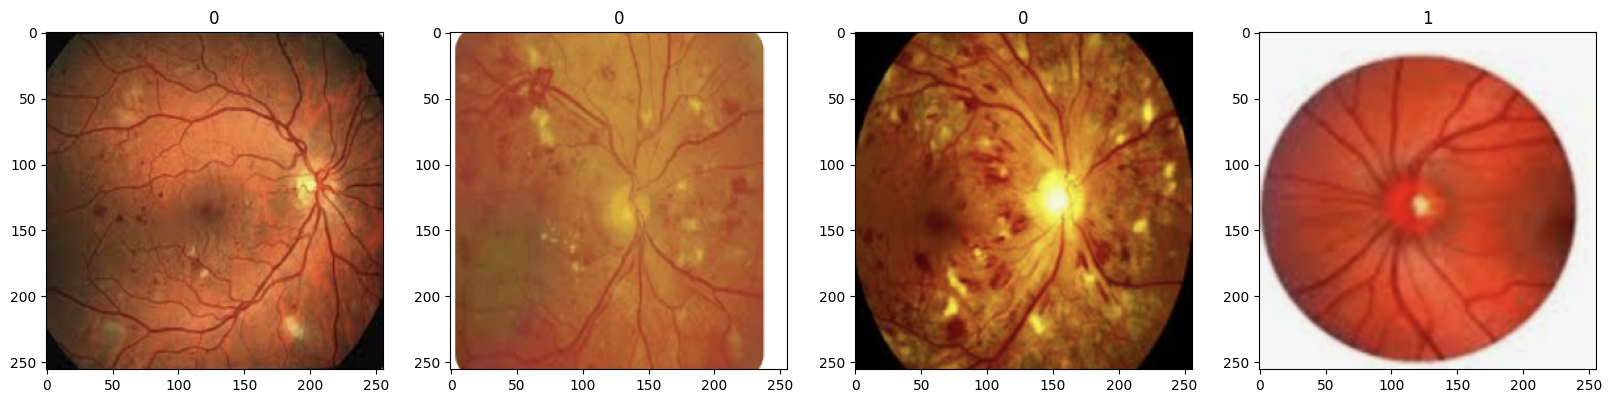

In [6]:
#0 = diebetic
#1 = normal

In [16]:
train = dataset.take(train_size)
val = dataset.skip(train_size).take(validation_size)
test = dataset.skip(train_size + validation_size).take(test_size)


#model time
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.4909 - loss: 0.8324 - val_accuracy: 0.7500 - val_loss: 0.6720
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6836 - loss: 0.6720 - val_accuracy: 0.7188 - val_loss: 0.6185
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.7044 - loss: 0.6307 - val_accuracy: 0.8125 - val_loss: 0.5446
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5729 - loss: 0.6173 - val_accuracy: 0.7500 - val_loss: 0.5439
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.7669 - loss: 0.5546 - val_accuracy: 0.7188 - val_loss: 0.4946
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8112 - loss: 0.4447 - val_accuracy: 0.9062 - val_loss: 0.4090
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.8451 - loss: 0.4247 - val_accuracy: 0.8750 - val_loss: 0.3595
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8451 - loss: 0.3393 - val_accuracy: 0.9062 - val_loss: 0.2688
Epoch 9/20
3/3 ━

In [9]:
import cv2

In [13]:
from tensorflow.keras.models import load_model
import numpy as np
model.save(os.path.join('imageclassifier.h5'))
new_model = load_model('imageclassifier.h5')
